# Problem Statement

Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks.

## Importing Libraries

In [110]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import plotly.express as px

In [111]:
#Mounting Path
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [112]:
root_path='/content/gdrive/MyDrive/Colab Notebooks/capstone'

## Importing Data

In [113]:
# Data Reading

store = pd.read_csv(root_path+ '/' + 'store.csv')

In [114]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## EDA

In [115]:
#Checking Shape of data
store.shape

(1115, 10)

In [116]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### All data points are non-null and therefore do not require any imputation or further analysis


In [117]:
# List of numerical columns
store_fields=store.columns
store_numeric = list(store.select_dtypes(include=['int64', 'float64']).columns)
store[store_numeric]

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,1270.0,9.0,2008.0,0,NaN,NaN
1,2,570.0,11.0,2007.0,1,13.0,2010.0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,620.0,9.0,2009.0,0,NaN,NaN
4,5,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...
1110,1111,1900.0,6.0,2014.0,1,31.0,2013.0
1111,1112,1880.0,4.0,2006.0,0,NaN,NaN
1112,1113,9260.0,NaN,NaN,0,NaN,NaN
1113,1114,870.0,NaN,NaN,0,NaN,NaN


In [118]:
# List of categorical columns
store_category = list(store.select_dtypes(include=['object']).columns)
store[store_category]

,StoreType,Assortment,PromoInterval
0,c,a,NaN
1,a,a,"Jan,Apr,Jul,Oct"
2,a,a,"Jan,Apr,Jul,Oct"
3,c,c,NaN
4,a,a,NaN
...,...,...,...
1110,a,a,"Jan,Apr,Jul,Oct"
1111,c,c,NaN
1112,a,c,NaN
1113,a,c,NaN


In [119]:
null_values=store.isnull().mean()*100
null_values

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

#### Store data has null values, we will need to impute them

Absence of promo values would mean there are no promotions running on the store, we can impute promo2sinceweek and promo2sinceyear with zero and promointerval with no promotion

In [120]:
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'] =store['PromoInterval'].replace(np.nan, 'No Promotion')

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

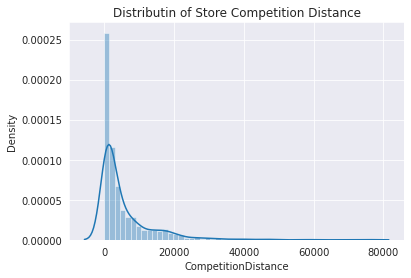

In [121]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

#### CompetitionDistance field has insignificant no. of null values, we will impute it with its median

The distribution is right skewed, so we'll replace missing values with the median.

In [122]:
# replace missing values in CompetitionDistance with median for the store dataset
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

In [123]:
# Let's examine the distribution of the value of these columns
store['CompetitionOpenSinceMonth'].describe()

count    761.000000
mean       7.224704
std        3.212348
min        1.000000
25%        4.000000
50%        8.000000
75%       10.000000
max       12.000000
Name: CompetitionOpenSinceMonth, dtype: float64

In [124]:
store['CompetitionOpenSinceYear'].describe()

count     761.000000
mean     2008.668857
std         6.195983
min      1900.000000
25%      2006.000000
50%      2010.000000
75%      2013.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64

#### CompetitionOpenSinceMonth and CompetitionOpenSinceYear has null values, we will handle them below.

In [125]:
# for CompetitionOpenSinceYear and CompetitionOpenSinceMonth both mean and median are almost close.So let us impute the missing values with median.
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].median(), inplace=True)
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].median(), inplace=True)


# Data Analysis

In [126]:
store_numeric



['Store',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

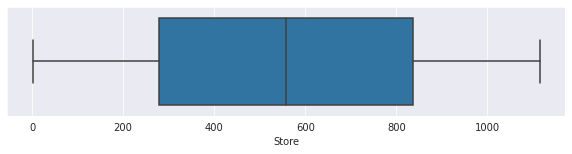

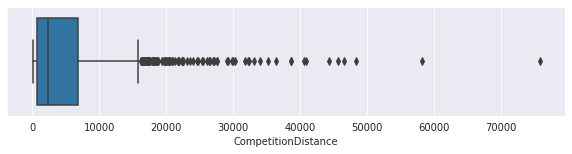

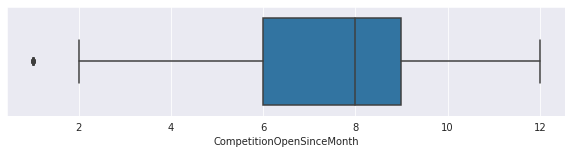

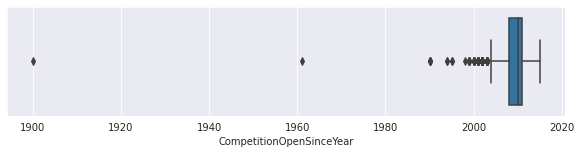

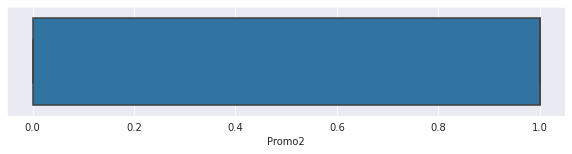

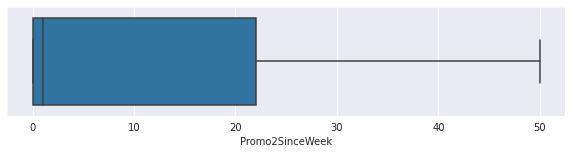

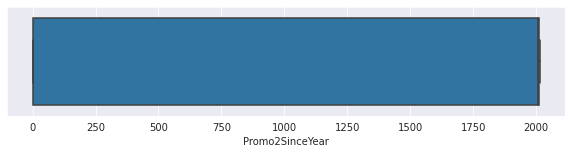

In [127]:
#box plot for store data 
for i in store_numeric:
    plt.figure(figsize=[10,2])
    sns.boxplot(store[i])
    plt.show()
    

In [128]:
store['CompetitionDistance'] = store['CompetitionDistance'].apply(lambda x: store['CompetitionDistance'].quantile(0.99) if x > store['CompetitionDistance'].quantile(0.99) else x)


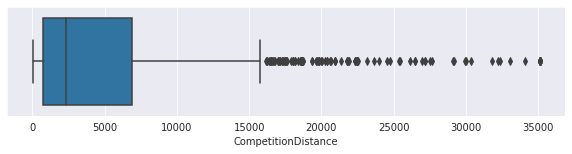

In [129]:
#box plot for CompetitionDistance
plt.figure(figsize=[10,2])
sns.boxplot(store['CompetitionDistance'])
plt.show()

In [130]:
null_values=store.isnull().mean()*100
null_values

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

## Univariate Data Analysis on datasets

### For Store Data

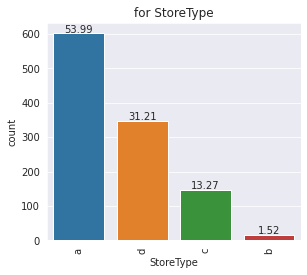

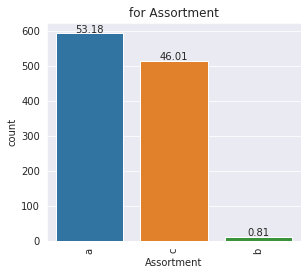

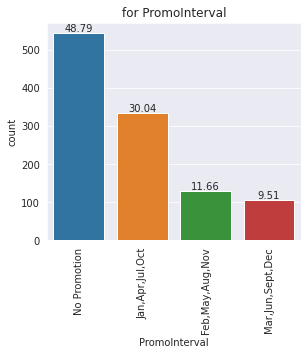

In [131]:
j=0
for i in store_category:
  if j<len(store_category):
    j=j+1
    plt.figure(figsize=[10,4])
    plt.subplot(1,2,1).set_title(i)
    plt.ylabel("Count")
    ax=sns.countplot(x=i, data=store,order = store[i].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title("for {}".format(i))
    for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(store) * 100),
                    ha="center")
   
     

### Inferences on store data



*   The majority of the stores, over 54%, are type A.
*   The majority of stores have type A assortments, while other types of assortments are scarce.
*   Promotions are focused in the months of January, April, July, and October.
*   48% of retailers have no promotions in the store.






In [132]:
store = store.replace({'Assortment': {'a':'Basic', 'b':'Extra', 'c':'Extended'}})
store['Assortment'].value_counts()

Basic       593
Extended    513
Extra         9
Name: Assortment, dtype: int64

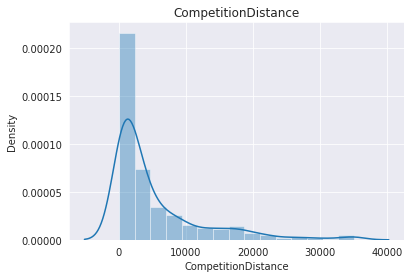

In [133]:
plt.title('CompetitionDistance')
sns.distplot(store['CompetitionDistance'],bins=15)
plt.show()

In [134]:
# Data Reading
train = pd.read_csv(root_path+ '/' + 'train.csv')

In [135]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [136]:
#Checking data size

train.shape

(1017209, 9)

In [137]:
#Checking the structure
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [138]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [140]:
train = train.replace({'Open': {0:'Closed', 1:'Open'}})
train['Open'].value_counts()

Open      844392
Closed    172817
Name: Open, dtype: int64

In [141]:
train_analysis=['DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

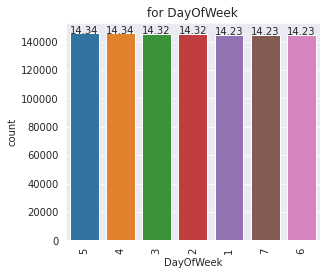

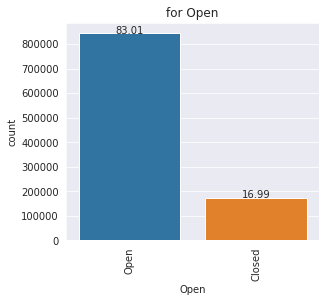

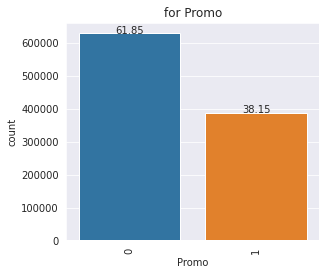

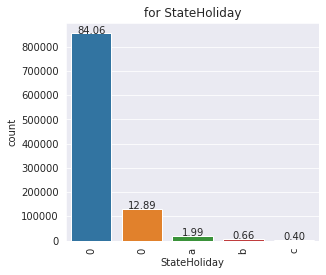

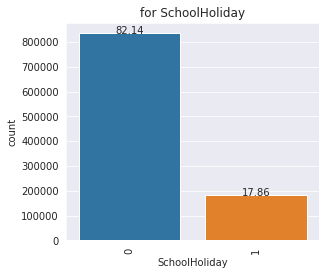

In [142]:
j=0
for i in train_analysis:
  if j<len(train_analysis):
    j=j+1
    plt.figure(figsize=[10,4])
    plt.subplot(1,2,1).set_title(i)
    plt.ylabel("Count")
    ax=sns.countplot(x=i, data=train,order = train[i].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title("for {}".format(i))
    for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(train) * 100),
                    ha="center")
   

### Inferences on train data

- All days of the week have equal contribution.
- Stores are closed on only 17% data points.
- Promotions are active on only 38% records.

### Bivariate analysis

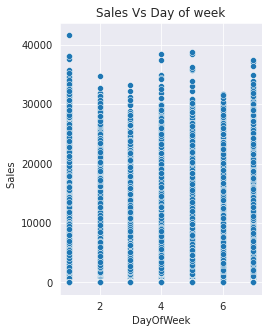

In [143]:
plt.figure(figsize=[8,5])
plt.subplot(1,2,1).set_title('Sales Vs Day of week')
sns.scatterplot(train.DayOfWeek,train.Sales)
plt.xlabel('DayOfWeek')
plt.ylabel('Sales          ')
plt.show()

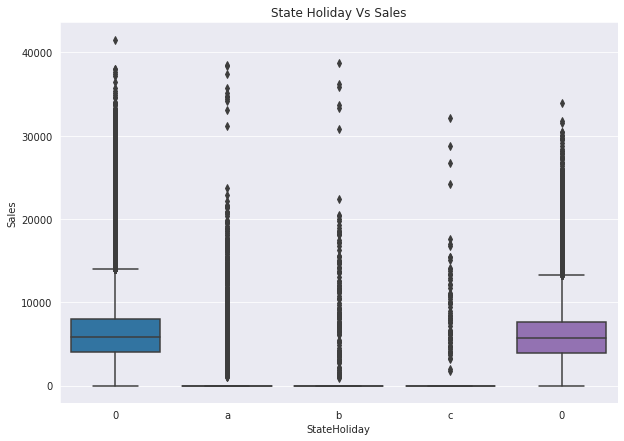

In [144]:
#Contract status and Annuity of previous appliction
plt.figure(figsize=[10,7])
plt.title('State Holiday Vs Sales')
sns.boxplot(data=train,x='StateHoliday',y='Sales')
plt.show()

In [145]:
train_numeric = list(train.select_dtypes(include=['int64', 'float64']).columns)
train[train_numeric]

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
0,1,5,5263,555,1,1
1,2,5,6064,625,1,1
2,3,5,8314,821,1,1
3,4,5,13995,1498,1,1
4,5,5,4822,559,1,1
...,...,...,...,...,...,...
1017204,1111,2,0,0,0,1
1017205,1112,2,0,0,0,1
1017206,1113,2,0,0,0,1
1017207,1114,2,0,0,0,1


## Box plot data analysis

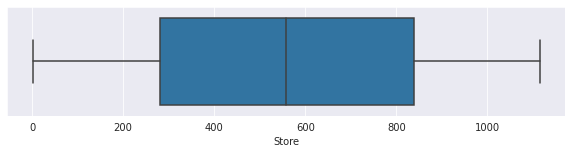

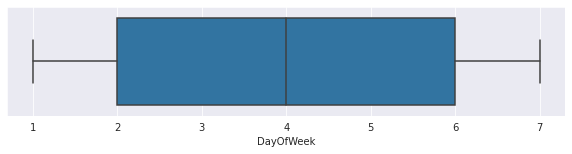

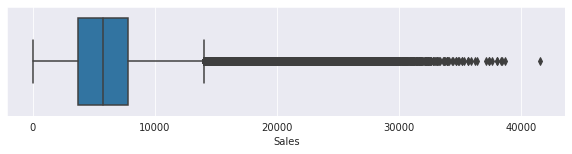

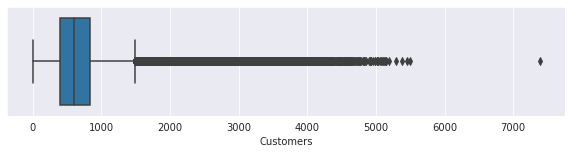

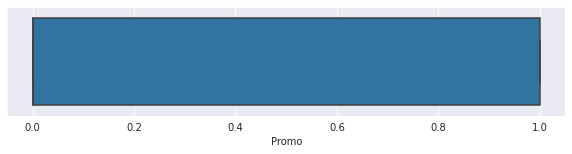

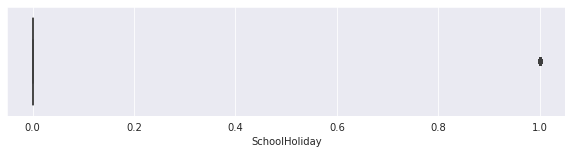

In [146]:
for i in train_numeric:
    plt.figure(figsize=[10,2])
    sns.boxplot(train[i])
    plt.show()

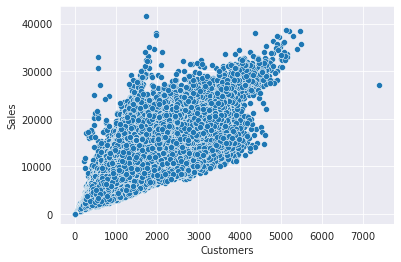

In [147]:
sns.scatterplot(x = 'Customers', y = 'Sales', data = train)
plt.show()

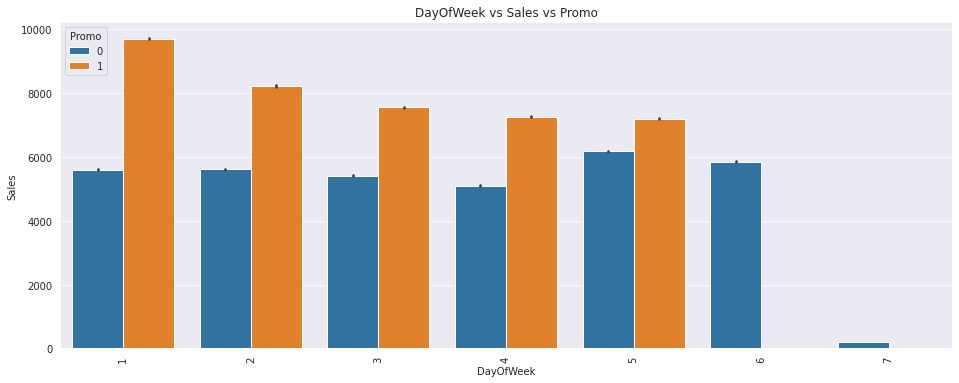

In [148]:
#bargraph for Day fo week, sales
plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='Promo',data=train)
plt.title("DayOfWeek vs Sales vs Promo")
plt.xticks(rotation = 90)
plt.show()

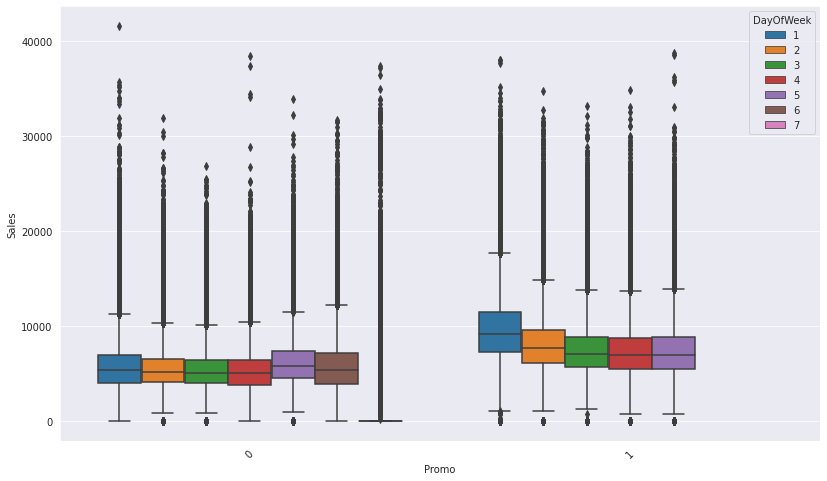

In [149]:
#box plot for Sales,promo
plt.figure(figsize=[30,8])
sns.set_style("darkgrid")
plt.subplot(1,2,1).set_title('')
plt.xticks(rotation=45)
sns.boxplot(data =train, x='Promo',y='Sales', hue ='DayOfWeek',orient='v')
plt.show()

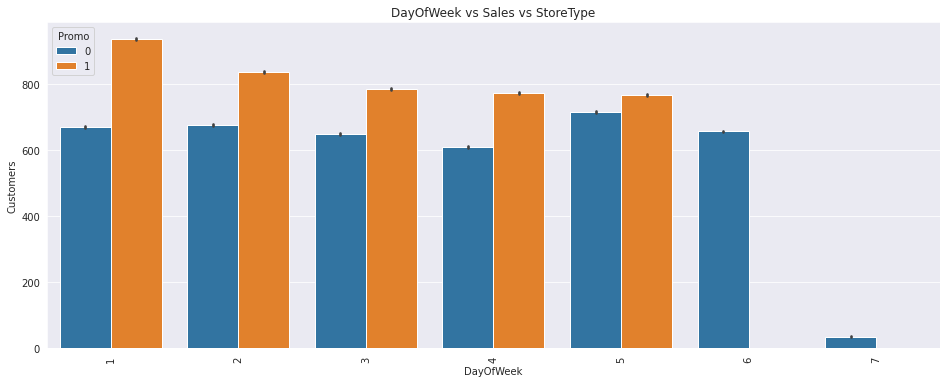

In [150]:
#bar graph for DayOfWeek vs Sales vs StoreType
plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Customers',hue='Promo',data=train)
plt.title("DayOfWeek vs Sales vs StoreType")
plt.xticks(rotation = 90)
plt.show()

# Merge data

In [151]:
inp=train.merge(right=store, on='Store', how='inner')

In [152]:
inp.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,Open,1,0,1,c,Basic,1270.0,9.0,2008.0,0,0.0,0.0,No Promotion
1,1,4,2015-07-30,5020,546,Open,1,0,1,c,Basic,1270.0,9.0,2008.0,0,0.0,0.0,No Promotion
2,1,3,2015-07-29,4782,523,Open,1,0,1,c,Basic,1270.0,9.0,2008.0,0,0.0,0.0,No Promotion
3,1,2,2015-07-28,5011,560,Open,1,0,1,c,Basic,1270.0,9.0,2008.0,0,0.0,0.0,No Promotion
4,1,1,2015-07-27,6102,612,Open,1,0,1,c,Basic,1270.0,9.0,2008.0,0,0.0,0.0,No Promotion


In [153]:
inp.shape

(1017209, 18)

In [154]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  object 
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [155]:
inp.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,3.815145e-01,1.786467e-01,5.303266e+03,7.469899e+00,2.009107e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,4.857586e-01,3.830564e-01,7.053164e+03,2.677243e+00,4.986802e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,0.000000e+00,0.000000e+00,2.325000e+03,8.000000e+00,2.010000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.510780e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [156]:
null_values=inp.isnull().mean()*100
null_values

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

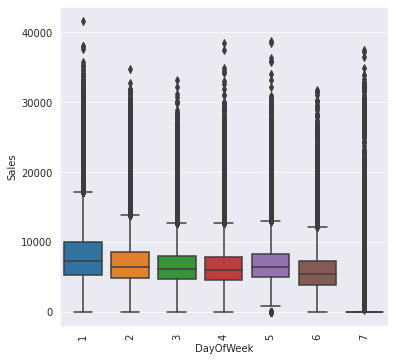

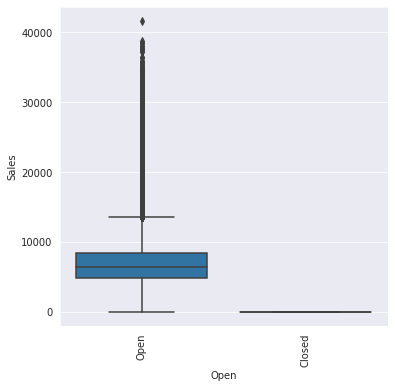

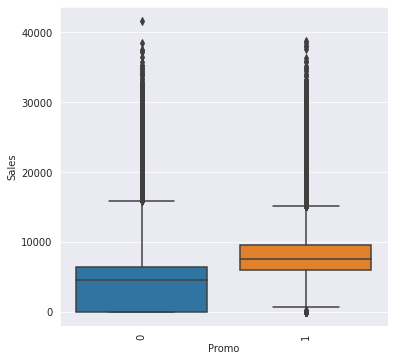

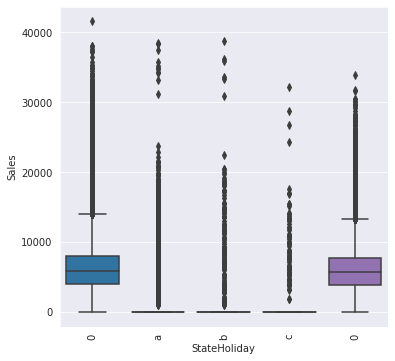

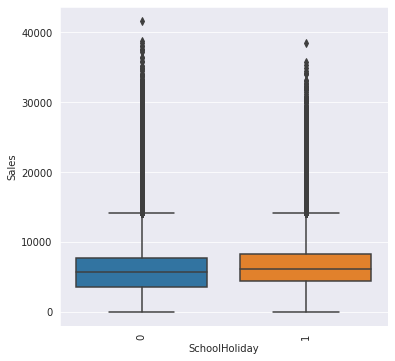

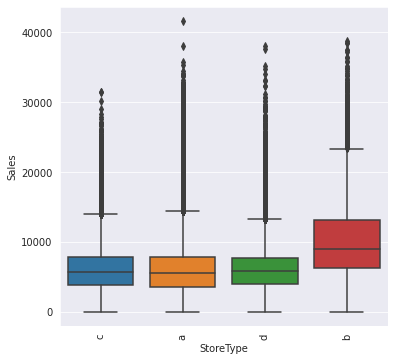

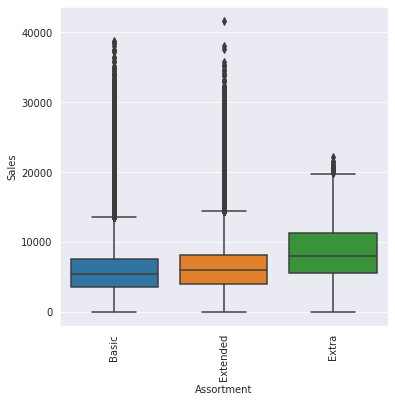

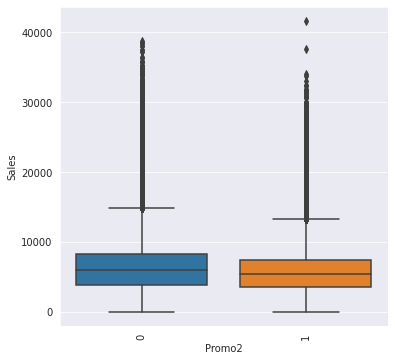

In [157]:
#box plot for DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2
numeric_list=['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2']
j=0
for i in numeric_list:
  if j<len(numeric_list):
    j=j+1
    plt.figure(figsize=[20,20])
    plt.subplot(3,3,j)
    sns.boxplot(x = i , y = 'Sales', data = inp)
    plt.xticks(rotation = 90)
    
    

<Figure size 2880x2880 with 0 Axes>

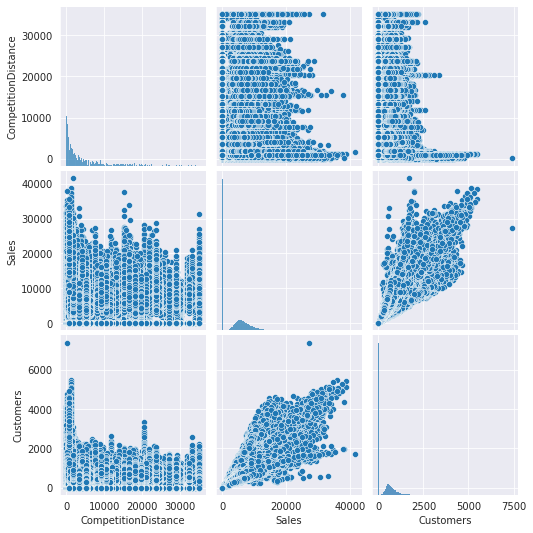

In [158]:
# Pairwise plot for CompetitionDistance,Sales,Customers

plt.figure(figsize=(40, 40))
sns.pairplot(inp[['CompetitionDistance','Sales','Customers']])
plt.show()

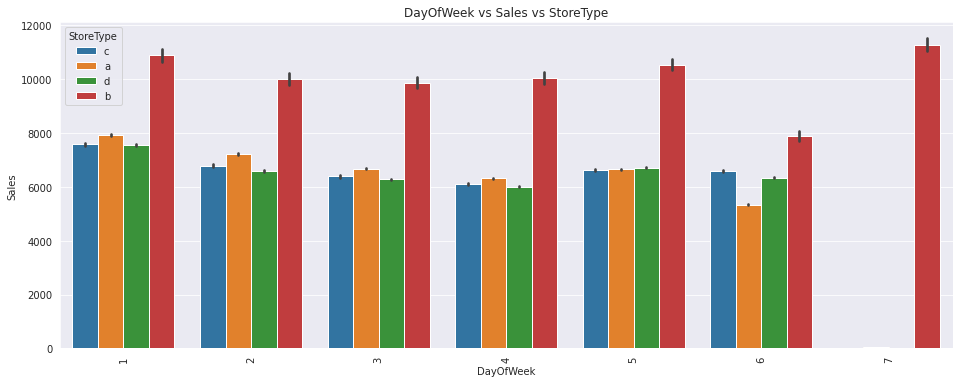

In [159]:
plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='StoreType',data=inp)
plt.title("DayOfWeek vs Sales vs StoreType")
plt.xticks(rotation = 90)
plt.show()

- Store type b is having highest sales for every day of week

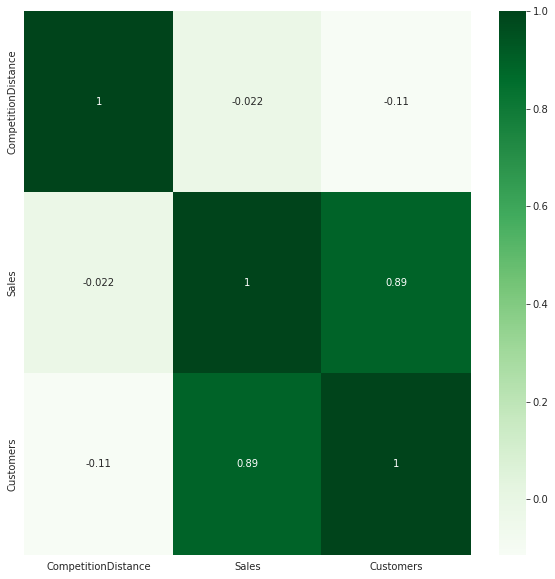

In [160]:
# Correlation plot for CompetitionDistance,Sales,Customers

corr = inp[['CompetitionDistance','Sales','Customers']].corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap="Greens")
plt.show()


## Feature Engineeering Step

In [161]:
# Creating a new DataFrame for the dummy variables of the day of the week 
day_of_week_dummies = pd.get_dummies(inp['DayOfWeek'], prefix='DayOfWeek')

# Dropping the first column to avoid multicollinearity
day_of_week_dummies.drop(day_of_week_dummies.columns[0], axis=1, inplace=True)

# Adding the dummy variables to the inp DataFrame
inp = pd.concat([inp, day_of_week_dummies], axis=1)


In [162]:
# Creating a new DataFrame for the dummy variables of the StoreType
store_type_dummies = pd.get_dummies(inp['StoreType'], prefix='StoreType')

# Dropping the first column to avoid multicollinearity
store_type_dummies.drop(store_type_dummies.columns[0], axis=1, inplace=True)

# Adding the dummy variables to the inp DataFrame
inp = pd.concat([inp, store_type_dummies], axis=1)


In [163]:
# Creating a new DataFrame for the dummy variables of the Assortment
assortment_dummies = pd.get_dummies(inp['Assortment'], prefix='Assortment')

# Dropping the first column to avoid multicollinearity
assortment_dummies.drop(assortment_dummies.columns[0], axis=1, inplace=True)

# Adding the dummy variables to the inp DataFrame
inp = pd.concat([inp, assortment_dummies], axis=1)

In [164]:
# Viewing the first 5 rows of the inp DataFrame
inp.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_Extended,Assortment_Extra
0,1,5,2015-07-31,5263,555,Open,1,0,1,c,...,0,0,1,0,0,0,1,0,0,0
1,1,4,2015-07-30,5020,546,Open,1,0,1,c,...,0,1,0,0,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,Open,1,0,1,c,...,1,0,0,0,0,0,1,0,0,0
3,1,2,2015-07-28,5011,560,Open,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
4,1,1,2015-07-27,6102,612,Open,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0


In [165]:
# Removing the DayOfWeek, StoreType, and Assortment columns from the inp DataFrame
inp.drop(columns=['DayOfWeek','StoreType','Assortment'], inplace=True)

# Viewing the first 5 rows of the updated inp DataFrame
inp.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_Extended,Assortment_Extra
0,1,2015-07-31,5263,555,Open,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,Open,1,0,1,1270.0,9.0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,Open,1,0,1,1270.0,9.0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,Open,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,Open,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0


### We can combine the date-related information from the competition data into a single column.

In [166]:
# Creating a new column 'CompetitionOpenSince' by combining 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' columns
inp['CompetitionOpenSince'] = inp['CompetitionOpenSinceYear'].astype(int).astype(str) + '-' + inp['CompetitionOpenSinceMonth'].astype(int).astype(str) + '-01'

# Viewing the first 5 rows of the updated inp DataFrame
inp.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_Extended,Assortment_Extra,CompetitionOpenSince
0,1,2015-07-31,5263,555,Open,1,0,1,1270.0,9.0,...,0,1,0,0,0,1,0,0,0,2008-9-01
1,1,2015-07-30,5020,546,Open,1,0,1,1270.0,9.0,...,1,0,0,0,0,1,0,0,0,2008-9-01
2,1,2015-07-29,4782,523,Open,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
3,1,2015-07-28,5011,560,Open,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
4,1,2015-07-27,6102,612,Open,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01


In [167]:
# Removing the CompetitionOpenSinceMonth, CompetitionOpenSinceYear columns from the inp DataFrame
inp.drop(columns=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], inplace=True)

In [168]:
# Replacing the values of 'CompetitionOpenSince' column with NaN where the value is '0-0-01'
inp['CompetitionOpenSince'].replace('0-0-01', np.nan, inplace=True)

In [169]:
# Finding the rows where the value of 'CompetitionOpenSince' is '0-0-01'
comp_open_null = inp.loc[inp['CompetitionOpenSince'] == '0-0-01']

# Replacing the values of 'CompetitionOpenSince' column with NaN for the above found rows
inp.loc[comp_open_null.index, 'CompetitionOpenSince'] = np.nan

In [170]:
# Displaying information about the inp DataFrame, including data types of columns
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   Date                  1017209 non-null  object 
 2   Sales                 1017209 non-null  int64  
 3   Customers             1017209 non-null  int64  
 4   Open                  1017209 non-null  object 
 5   Promo                 1017209 non-null  int64  
 6   StateHoliday          1017209 non-null  object 
 7   SchoolHoliday         1017209 non-null  int64  
 8   CompetitionDistance   1017209 non-null  float64
 9   Promo2                1017209 non-null  int64  
 10  Promo2SinceWeek       1017209 non-null  float64
 11  Promo2SinceYear       1017209 non-null  float64
 12  PromoInterval         1017209 non-null  object 
 13  DayOfWeek_2           1017209 non-null  uint8  
 14  DayOfWeek_3           1017209 non-

### The 'Date' and 'CompetitionOpenSince' columns in the inp DataFrame should be converted to datetime objects.

In [171]:
# Converting the 'Date' column to datetime object
inp['Date'] = pd.to_datetime(inp['Date'], errors='coerce')

In [172]:
# Converting the 'CompetitionOpenSince' column to datetime object
inp['CompetitionOpenSince'] = pd.to_datetime(inp['CompetitionOpenSince'], errors='coerce')

In [173]:
# Displaying information about the inp DataFrame, including data types of columns after the above conversions
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  object        
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

### There are store transaction dates where sales were made both before and after the competition started. Let's create a new flag to identify these sales.

In [174]:
# Defining a function to calculate the competition start date
def calculate_competition(row):
    if row['CompetitionOpenSince'] > row['Date']:
        return 1
    else:
        return 0

# Creating a new column 'Before_Competition'
inp['Before_Competition'] = inp[['CompetitionOpenSince','Date']].apply(calculate_competition, axis=1)


In [175]:
inp.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_Extended,Assortment_Extra,CompetitionOpenSince,Before_Competition
0,1,2015-07-31,5263,555,Open,1,0,1,1270.0,0,...,1,0,0,0,1,0,0,0,2008-09-01,0
1,1,2015-07-30,5020,546,Open,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
2,1,2015-07-29,4782,523,Open,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
3,1,2015-07-28,5011,560,Open,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
4,1,2015-07-27,6102,612,Open,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0


In [176]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  object        
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

### The Before and after competition field does not have a significant impact on the sales of stores, therefore, it can be removed from the inp DataFrame

In [177]:
# Removing the 'Before_Competition' column from the inp DataFrame
inp.drop(columns=['Before_Competition'], inplace=True)

### The 'CompetitionOpenSince' field is used to derive the 'Before_Competition' field, therefore it is not needed and can be removed from the inp DataFrame.

In [178]:
# Removing the 'CompetitionOpenSince' column from the inp DataFrame
inp.drop(columns=['CompetitionOpenSince'], inplace=True)

In [179]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  int64         
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  object        
 5   Promo                1017209 non-null  int64         
 6   StateHoliday         1017209 non-null  object        
 7   SchoolHoliday        1017209 non-null  int64         
 8   CompetitionDistance  1017209 non-null  float64       
 9   Promo2               1017209 non-null  int64         
 10  Promo2SinceWeek      1017209 non-null  float64       
 11  Promo2SinceYear      1017209 non-null  float64       
 12  PromoInterval        1017209 non-null  object        
 1

### We found earlier that the variables related to 'Promo2' do not have a significant impact on sales, thus they can be removed from the inp DataFrame.

In [180]:
# Removing the 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear' and 'Promo2SinceYear' columns from the inp DataFrame
inp.drop(columns=['Promo2','Promo2SinceWeek','Promo2SinceYear','Promo2SinceYear'], inplace=True)

In [181]:
inp.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_Extended,Assortment_Extra
0,1,2015-07-31,5263,555,Open,1,0,1,1270.0,No Promotion,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,Open,1,0,1,1270.0,No Promotion,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,Open,1,0,1,1270.0,No Promotion,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,Open,1,0,1,1270.0,No Promotion,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,Open,1,0,1,1270.0,No Promotion,...,0,0,0,0,0,0,1,0,0,0


## Time Series Analysis


### From our previous analysis, we have determined that an increase in the number of customers leads to an increase in sales, indicating that the number of customers is an important variable in predicting sales.

In [182]:
# Setting the 'Date' column as the index of the inp DataFrame
inp_df = inp.set_index('Date')

# Viewing the first five rows of the updated DataFrame
inp_df.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_Extended,Assortment_Extra
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,Open,1,0,1,1270.0,No Promotion,0,0,0,1,0,0,0,1,0,0,0
2015-07-30,1,5020,546,Open,1,0,1,1270.0,No Promotion,0,0,1,0,0,0,0,1,0,0,0
2015-07-29,1,4782,523,Open,1,0,1,1270.0,No Promotion,0,1,0,0,0,0,0,1,0,0,0
2015-07-28,1,5011,560,Open,1,0,1,1270.0,No Promotion,1,0,0,0,0,0,0,1,0,0,0
2015-07-27,1,6102,612,Open,1,0,1,1270.0,No Promotion,0,0,0,0,0,0,0,1,0,0,0


In [183]:
#Data is now grouped by date level for analysis
inp_df_agg = inp_df.groupby('Date').agg({'Sales': 'mean',
'Customers':'mean',
'Promo': 'sum',
'SchoolHoliday':'sum',
'DayOfWeek_2':'mean',
'DayOfWeek_3':'mean',
'DayOfWeek_4':'mean',
'DayOfWeek_5':'mean',
'DayOfWeek_6':'mean',
'DayOfWeek_7':'mean'})
inp_df_agg.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,87.284560,17.496409,0,1114,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,6233.030493,748.049327,0,1115,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,5693.112108,682.547085,0,1040,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,5954.218834,701.468161,0,1040,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,5337.751570,616.566816,0,112,0.0,0.0,0.0,0.0,1.0,0.0


In [184]:
# Defining a function to plot a time-series graph
def timeseries_plot(series, column):
    fig = plt.figure(figsize=(20, 3))
    series.plot()
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title('For {}'.format(column))
    plt.show()


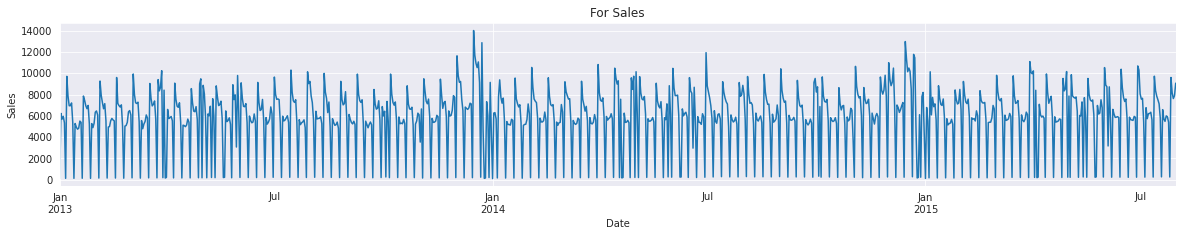

In [185]:
# Creating a time-series graph of the 'Sales' column
timeseries_plot(inp_df_agg['Sales'], 'Sales')

### Let's create a function that performs seasonal decomposition on time-series data

In [186]:
from pylab import rcParams
import statsmodels.api as sm
def plot_seasonal_decomposition(series, column, model):
    rcParams['figure.figsize'] = 18, 14
    decomposition = sm.tsa.seasonal_decompose(series, model=model) # additive seasonal index
    fig=decomposition.plot()
    plt.show()
    print('Mean Residual for {}={}'.format(column, decomposition.resid.mean()))


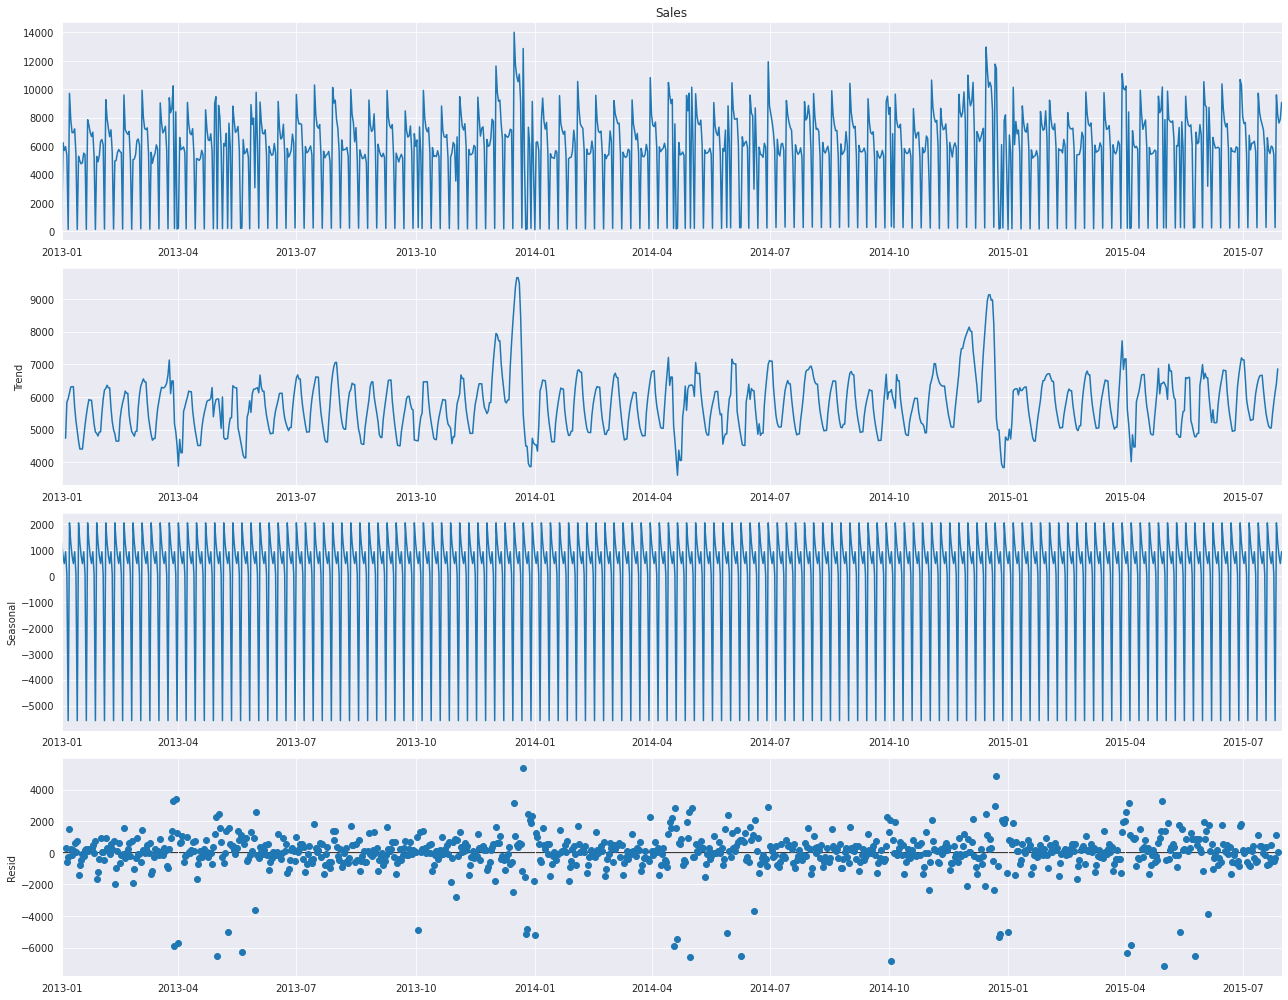

Mean Residual for Sales=0.6202792140320115


In [187]:
# Plotting seasonal decomposition of 'Sales' column
plot_seasonal_decomposition(inp_df_agg['Sales'], 'Sales', 'additive')


## Casualty testing

### We have observed that there is a strong correlation between Sales and Customers. Let's investigate the cause and effect relationship between them.


In [188]:
# Importing the granger causality test function from statsmodels library
from statsmodels.tsa.stattools import grangercausalitytests

# Perform granger causality test between 'Sales' and 'Customers' columns
causality_sales = grangercausalitytests(inp_df_agg[['Sales','Customers']].dropna(), 4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=207.3179, p=0.0000  , df_denom=938, df_num=1
ssr based chi2 test:   chi2=207.9810, p=0.0000  , df=1
likelihood ratio test: chi2=187.9060, p=0.0000  , df=1
parameter F test:         F=207.3179, p=0.0000  , df_denom=938, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=117.7859, p=0.0000  , df_denom=935, df_num=2
ssr based chi2 test:   chi2=236.8316, p=0.0000  , df=2
likelihood ratio test: chi2=211.2191, p=0.0000  , df=2
parameter F test:         F=117.7859, p=0.0000  , df_denom=935, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=84.6075 , p=0.0000  , df_denom=932, df_num=3
ssr based chi2 test:   chi2=255.7290, p=0.0000  , df=3
likelihood ratio test: chi2=226.1668, p=0.0000  , df=3
parameter F test:         F=84.6075 , p=0.0000  , df_denom=932, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=70.9777 , p=0.0000  

## Stationary test


### Let's create a function that performs the Augmented Dickey-Fuller test to check for stationarity in time-series data.

In [189]:
# Importing the adfuller function from statsmodels library
from statsmodels.tsa.stattools import adfuller

def stationary_test(df):
    for column in df.columns:
        print('For', column)
        print('*'*100)
        result = adfuller(df[column], autolag='AIC')
        print('ADF Statistic:', result[0])
        print('P value:', result[1])
        output = {'test_statistic':round(result[0], 4), 'pvalue':round(result[1], 4), 'n_lags':round(result[2], 4), 'n_obs':result[3]}
        p_value = output['pvalue']
        if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")  


In [190]:
# Checking for stationarity of 'Sales' and 'Customers' columns
stationary_test(inp_df_agg[['Sales', 'Customers']])


For Sales
****************************************************************************************************
ADF Statistic: -5.650822837207899
P value: 9.870006549261777e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
For Customers
****************************************************************************************************
ADF Statistic: -5.933710149589023
P value: 2.3477735379187739e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


## Autocorelation


### Creating ACF and PACF plots

In [191]:
# Importing the plot_acf and plot_pacf functions from statsmodels library
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf




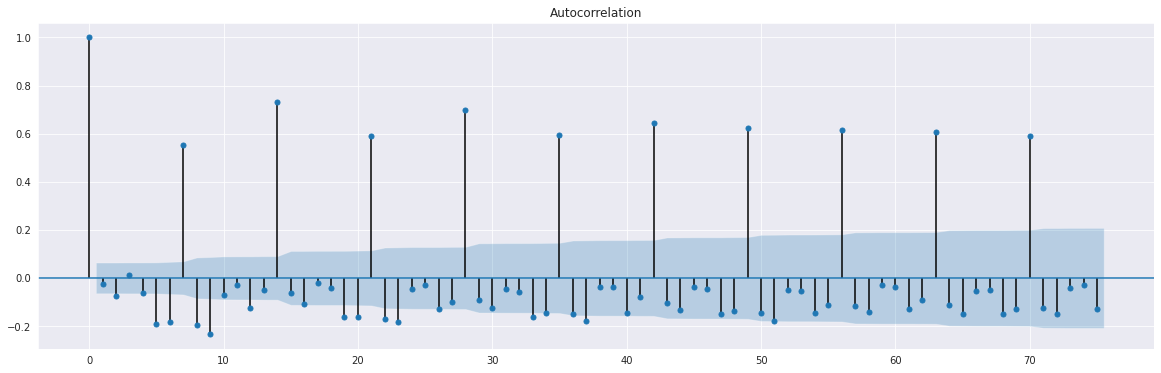

In [192]:
# Plotting the ACF for the 'Sales' column

plt.figure(figsize=(20,6))
plot_acf(inp_df_agg['Sales'], ax=plt.gca(), lags = 75)
plt.show()

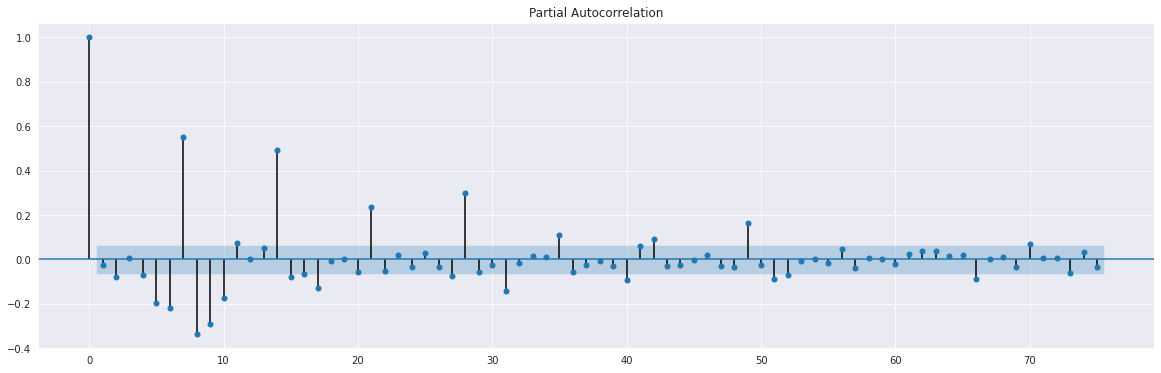

In [193]:
# Plotting the PACF for the 'Sales' column

plt.figure(figsize=(20,6))
plot_pacf(inp_df_agg['Sales'], ax=plt.gca(), lags = 75)
plt.show()


### For the ACF plot, we set q=0 as the correlation never comes down. For the PACF plot, we set q=7, since it is the highest lag since the start of the series

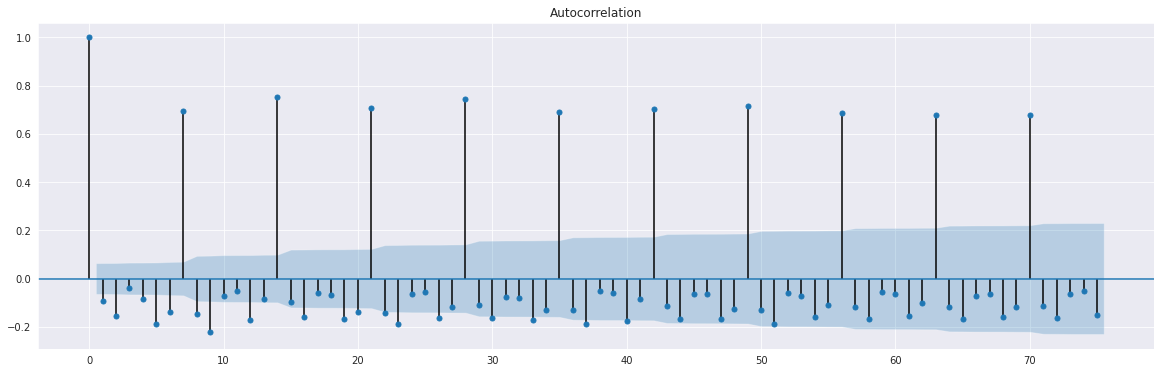

In [194]:
# Plotting the ACF for the 'Customers' column

plt.figure(figsize=(20,6))
plot_acf(inp_df_agg['Customers'], ax=plt.gca(), lags = 75)
plt.show()


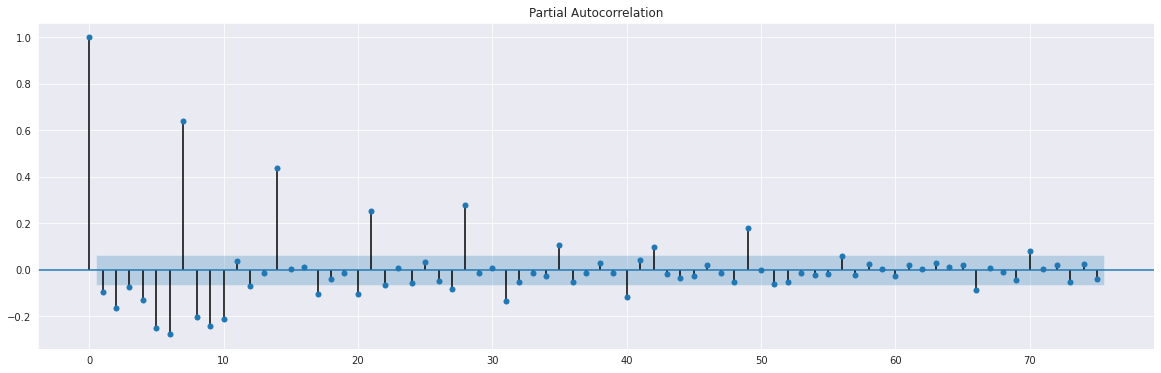

In [195]:
# Plotting the PACF for the 'Customers' column

plt.figure(figsize=(20,6))
plot_pacf(inp_df_agg['Customers'], ax=plt.gca(), lags = 75)
plt.show()

For the ACF plot, we set q=0 as the correlation never comes down. For the PACF plot, we set q=7, since it is the highest lag since the start of the series

### We plan to forecast sales for the next 6 weeks, which is 42 days. To do this, we will allocate 42 days for testing and the rest of the data for training

In [196]:
inp_df_agg.shape


(942, 10)

### We will use the first 900 rows of data for training and the last 42 rows for testing.

In [197]:
# Creating train and test splits
inp_len = 900
inp_df_agg_train = inp_df_agg.iloc[:inp_len, :]
inp_df_agg_test = inp_df_agg.iloc[inp_len:, :]


## Standardizing the numerical values in the test and train datasets using min-max normalization.

In [198]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the train data
inp_df_agg_train[['Sales','Customers','Promo','SchoolHoliday']] = scaler.fit_transform(inp_df_agg_train[['Sales','Customers','Promo','SchoolHoliday']])
inp_df_agg_train.head()


,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.0,0.999103,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,0.441350,0.543373,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-03,0.402577,0.494654,0.0,0.932735,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-04,0.421328,0.508727,0.0,0.932735,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-05,0.377057,0.445579,0.0,0.100448,0.0,0.0,0.0,0.0,1.0,0.0


In [199]:
# Applying the transformation on the test data
inp_df_agg_test[['Sales','Customers','Promo','SchoolHoliday']] = scaler.transform(inp_df_agg_test[['Sales','Customers','Promo','SchoolHoliday']])
inp_df_agg_test.head()


,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2015-06-20,0.405336,0.453472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-06-21,0.009824,0.015096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-06-22,0.415762,0.489576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06-23,0.399006,0.475851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-06-24,0.396755,0.474848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## VAR (Vector AutoRegressive Model)

In [200]:
# Creating exogenous and endogenous variables for VAR model
exog = inp_df_agg_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = inp_df_agg_train[['Sales', 'Customers']].astype(float)

# Creating a VAR model with the endogenous and exogenous variables
var_model = sm.tsa.VAR(endog,exog)

# Selecting the optimal lag length for the model
res = var_model.select_order(maxlags=15)

# Printing the summary of the selected model
print(res.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -12.15      -12.05   5.280e-06      -12.11
1       -12.27      -12.15   4.698e-06      -12.22
2       -12.27      -12.12   4.712e-06      -12.21
3       -12.30      -12.14   4.533e-06      -12.24
4       -12.31      -12.12   4.515e-06      -12.24
5       -12.31      -12.10   4.510e-06      -12.23
6       -12.32      -12.09   4.469e-06      -12.23
7       -12.32      -12.07   4.448e-06      -12.23
8       -12.48      -12.20   3.821e-06      -12.37
9       -12.51     -12.21*   3.707e-06      -12.39
10      -12.52      -12.21   3.648e-06      -12.40
11      -12.54      -12.20   3.581e-06      -12.41
12      -12.53      -12.18   3.604e-06      -12.40
13      -12.54      -12.16   3.574e-06      -12.40
14      -12.59      -12.19   3.421e-06     -12.43*
15     -12.59*      -12.17  3.395e-06*      -12.43
-------------------------------

In [201]:
#Fit the model with a lag of 11
var_model_final = var_model.fit(maxlags=11)

#Print the summary of the fitted model
print(var_model_final.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 17, Jan, 2023
Time:                     06:06:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.2106
Nobs:                     889.000    HQIC:                  -12.4169
Log likelihood:           3115.22    FPE:                3.56415e-06
AIC:                     -12.5446    Det(Omega_mle):     3.32801e-06
--------------------------------------------------------------------
Results for equation Sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.337940         0.057254            5.902           0.000
Promo                 0.169451         0.016244           10.432           0.000
SchoolHoliday        -0.033177         0.012687           -2

## Cointegration test

### Define a function for performing the Johansen test for cointegration


In [202]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen, select_coint_rank

def cointegration_test(df, lag): 
    alpha=0.05
    out = coint_johansen(df,-1,lag)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [203]:
inp_df_agg = inp_df_agg.round({'Sales':0,'Customers':0})

In [204]:
cointegration_test(inp_df_agg[['Sales','Customers']],10)
coint_rank = select_coint_rank(inp_df_agg[['Sales','Customers']],-1,10)


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  127.93    > 12.3212   =>   True
Customers ::  6.57      > 4.1296    =>   True


In [205]:
# Getting lag order
lag_order = var_model_final.k_ar
print("The lag order is: ",lag_order) 
# Creating the forecast input values
forecast_input = inp_df_agg_train[['Sales','Customers']].tail(lag_order).values
print("The forecast input values are: \n", forecast_input)


The lag order is:  11
The forecast input values are: 
 [[0.43595062 0.50832754]
 [0.41397174 0.4892133 ]
 [0.41579704 0.49799996]
 [0.41923316 0.49742961]
 [0.41303913 0.45743139]
 [0.0110916  0.01718541]
 [0.73892895 0.69369782]
 [0.61440719 0.61305964]
 [0.54882338 0.56709914]
 [0.5213138  0.5473912 ]
 [0.53850368 0.5678536 ]]


## Forecasting using VAR

In [206]:
# Creating the exogenous variable for forecasting
exog_vars = ['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']
exog_test = inp_df_agg_test[exog_vars].astype(float)
# Forecasting using VAR model
fc = var_model_final.forecast(y=forecast_input, steps=42,exog_future=exog_test)
# Creating a DataFrame for forecast values
var_forecast = pd.DataFrame(fc, index=inp_df_agg_test.index, columns=['Sales','Customers'])
print(var_forecast)


               Sales  Customers
Date                           
2015-06-20  0.441004   0.500055
2015-06-21  0.015879   0.013267
2015-06-22  0.427535   0.508562
2015-06-23  0.414973   0.506646
2015-06-24  0.377980   0.462299
2015-06-25  0.343401   0.426233
2015-06-26  0.434158   0.515352
2015-06-27  0.419477   0.473930
2015-06-28  0.021367   0.018221
2015-06-29  0.673658   0.670645
2015-06-30  0.594450   0.614292
2015-07-01  0.553478   0.580635
2015-07-02  0.535834   0.573351
2015-07-03  0.531206   0.571608
2015-07-04  0.412111   0.477377
2015-07-05 -0.004978   0.003536
2015-07-06  0.433787   0.506586
2015-07-07  0.403058   0.495314
2015-07-08  0.371098   0.461766
2015-07-09  0.343488   0.432761
2015-07-10  0.411344   0.498404
2015-07-11  0.422313   0.481738
2015-07-12  0.020724   0.019510
2015-07-13  0.658176   0.661308
2015-07-14  0.590138   0.612389
2015-07-15  0.543610   0.570956
2015-07-16  0.522737   0.559885
2015-07-17  0.527585   0.566556
2015-07-18  0.409254   0.475918
2015-07-

In [207]:
# Adding forecasted values to the test dataframe
inp_df_agg_test['VarForecastedSales']=var_forecast.Sales
inp_df_agg_test['VarForecastedCustomers']=var_forecast.Customers

### Function is created for visualizing the results

In [208]:
def plot_forecasted_timeseries(series, forecasted_series, variable, model):
    plt.figure(figsize=(20, 3))
    plt.plot(series, label='Actual')
    plt.plot(forecasted_series, label='Forecasted')
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.legend(loc='best')
    plt.title('{} Model for {}'.format(model, variable))
    plt.show()


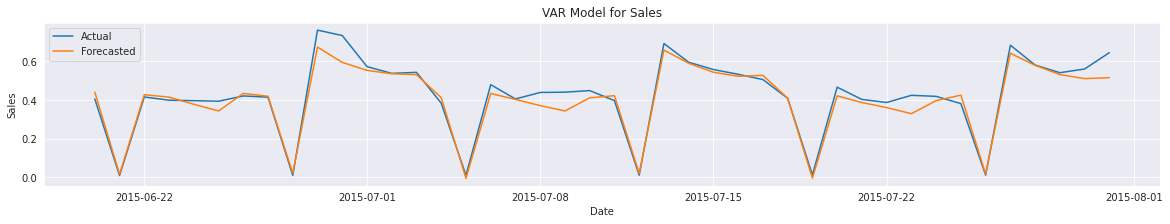

In [209]:
plot_forecasted_timeseries(inp_df_agg_test['Sales'], inp_df_agg_test['VarForecastedSales'], 'Sales', 'VAR')


### Creating a DataFrame to store the results

In [210]:
from sklearn.metrics import mean_squared_error

def create_summary_df():
    return pd.DataFrame(columns=['Store','Model','RMSE_SALES','MAPE_SALES','RMSE_CUSTOMERS','MAPE_CUSTOMERS'])

def summary(actual_sales, forecasted_sales, actual_customers, forecasted_customers, store, model):
    rmse_sales = np.sqrt(mean_squared_error(actual_sales, forecasted_sales)).round(2)
    mape_sales = np.round(np.mean(np.abs(actual_sales-forecasted_sales)/actual_sales)*100,2)
    rmse_customers = np.sqrt(mean_squared_error(actual_customers, forecasted_customers)).round(2)
    mape_customers = np.round(np.mean(np.abs(actual_customers-forecasted_customers)/actual_customers)*100,2)
    temp=pd.DataFrame({'Store':[store],'Model':[model], 'RMSE_SALES': [rmse_sales],'MAPE_SALES': [mape_sales] , 
                            'RMSE_CUSTOMERS': [rmse_customers],'MAPE_CUSTOMERS': [mape_customers]})
    return temp


In [211]:
summary_df = create_summary_df()
d = summary(inp_df_agg_test['Sales'], inp_df_agg_test['VarForecastedSales'],inp_df_agg_test['Customers'], inp_df_agg_test['VarForecastedCustomers'],'All','VAR')
summary_df = summary_df.append(d)
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.1


## Using Varmax to Forecast sales for next 6 weeks

In [212]:
# Creating exogenous variables
exog_vars = ['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']
exog = inp_df_agg_train[exog_vars].astype(float)

# Creating endogenous variables
endog_vars = ['Sales', 'Customers']
endog = inp_df_agg_train[endog_vars].astype(float)

# Fitting the VARMAX model
varmax_model = sm.tsa.VARMAX(endog, exog=exog, order=(7,0))
varmax_model_fit = varmax_model.fit(disp=False, maxiter=1000)

# Print the model summary
print(varmax_model_fit.summary())


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                3030.009
                              + intercept   AIC                          -5962.017
Date:                    Tue, 17 Jan 2023   BIC                          -5726.700
Time:                            06:09:54   HQIC                         -5872.124
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            1.19, 36.13   Jarque-Bera (JB):     5549.47, 1832.72
Prob(Q):                        0.27, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.61, 1.50   Skew:                     -1.76, -1.49
P

In [213]:
# Creating exogenous variables for test data
exog_test = inp_df_agg_test[exog_vars].astype(float)

# Creating endogenous variables for test data
endog_test = inp_df_agg_test[endog_vars]

# Forecasting on test data
varmax_fc = varmax_model_fit.predict(start=endog_test.index.min(),end=endog_test.index.max(),exog=exog_test)
varmax_forecast = pd.DataFrame(varmax_fc, index=endog_test.index, columns=endog_vars)
varmax_forecast.head()


,Sales,Customers
Date,,
2015-06-20,0.443775,0.502735
2015-06-21,0.011047,0.010094
2015-06-22,0.462054,0.528168
2015-06-23,0.404512,0.497431
2015-06-24,0.362703,0.458883


In [214]:
# Adding forecasted Sales and Customers to test data
inp_df_agg_test[f'VarmaxForecasted{"Sales"}'] = varmax_forecast['Sales']
inp_df_agg_test[f'VarmaxForecasted{"Customers"}'] = varmax_forecast['Customers']


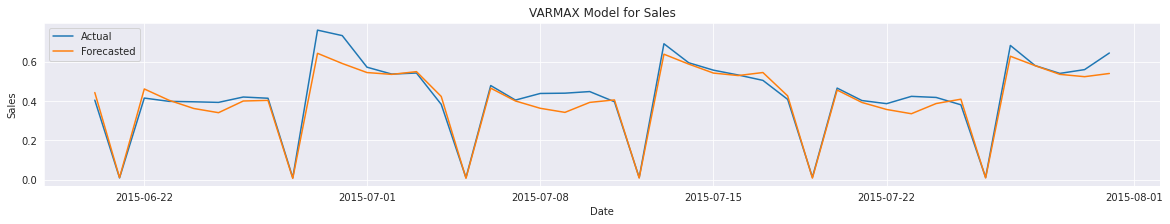

In [215]:
# Plotting time series of actual sales and forecasted sales
plot_forecasted_timeseries(inp_df_agg_test['Sales'], inp_df_agg_test['VarmaxForecastedSales'], 'Sales', 'VARMAX')


In [216]:
# Storing results in summary DataFrame
d = summary(inp_df_agg_test['Sales'], inp_df_agg_test['VarmaxForecastedSales'],
       inp_df_agg_test['Customers'], inp_df_agg_test['VarmaxForecastedCustomers'],'All','VARMAX')
summary_df = summary_df.append(d, ignore_index=True)
summary_df


,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,19.37,0.03,9.10
1,All,VARMAX,0.05,9.87,0.03,8.25
